<a href="https://colab.research.google.com/github/manjunath1005/K-Means_Clustering/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pandas as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path="/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv"

df=pd.read_csv(path)

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:
df['Genre'] = df['Genre'].replace({'Male': 1, 'Female': 0}).astype(int)
display(df.head())

/tmp/ipython-input-2622425670.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Genre'] = df['Genre'].replace({'Male': 1, 'Female': 0}).astype(int)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [8]:
x=df.iloc[:,3:].values

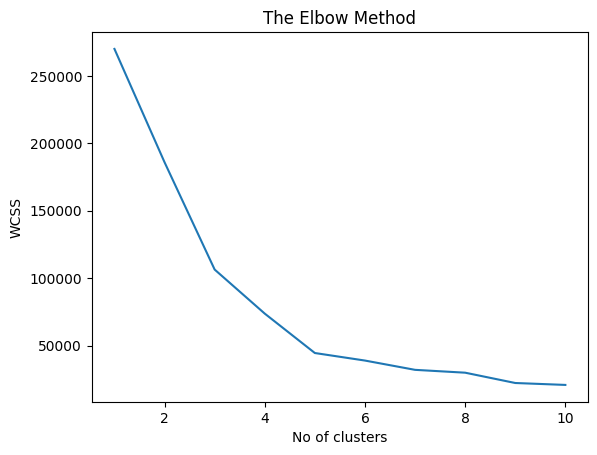

In [9]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 11):
  kmeans= KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("No of clusters")
plt.ylabel("WCSS")
plt.show()

In [10]:
kmeans=KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans=kmeans.fit_predict(x)

In [11]:
y_kmeans

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

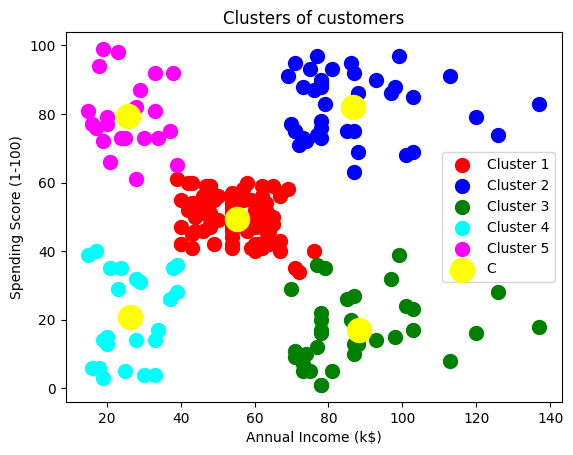

In [12]:
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s = 100, c='red', label='Cluster 1')
plt.scatter(x[y_kmeans== 1, 0], x[y_kmeans==1, 1], s = 100, c='blue', label='Cluster 2')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(x[y_kmeans==3, 0], x[y_kmeans==3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans== 4, 1], s = 100, c='magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c='yellow', label ='C')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Business Scenario
A wholesale distributor supplies products to different types of clients such as:

- Retail stores
- Cafés
- Hotels
- Restaurants

Currently, all customers are treated the same, which leads to:

- Inefficient inventory planning
- Poor marketing strategies
- Missed upselling opportunities

The company wants to group customers based on their purchasing behavior to improve decision-making.

In [13]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("binovi/wholesale-customers-data-set")

print("Path to dataset files:", path)

100%|██████████| 6.85k/6.85k [00:00<00:00, 12.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/binovi/wholesale-customers-data-set/versions/1


In [14]:
import os
os.listdir(path)

['Wholesale customers data.csv']

In [15]:
data = pd.read_csv(path + "/Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [16]:
data.to_csv('Wholesale customers data.csv')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [18]:
data.isna().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [19]:
features = data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
display(features.head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
print("Features scaled successfully.")
display(features_scaled[:5])

Features scaled successfully.


array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       [ 0.10011141, -0.62401993, -0.3929769 ,  0.6871443 , -0.49858822,
         0.09341105],
       [ 0.84023948, -0.05239645, -0.07935618,  0.17385884, -0.23191782,
         1.29934689]])

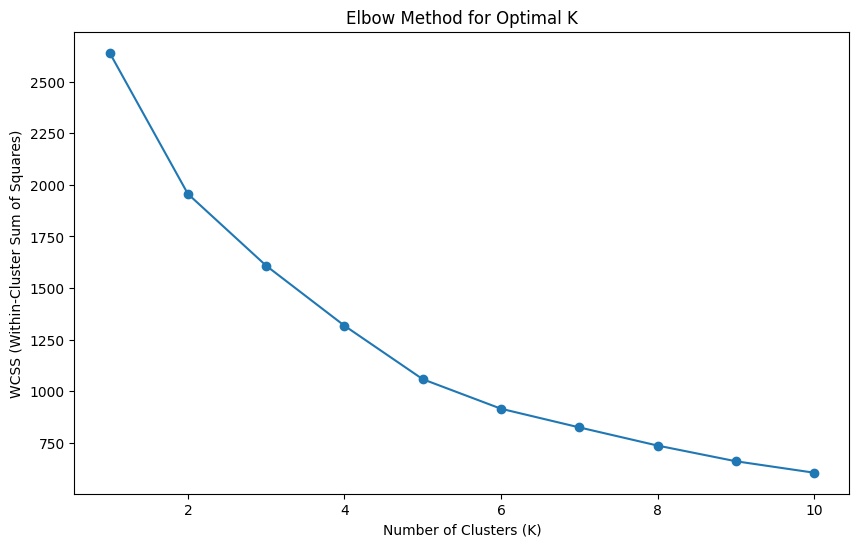

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [22]:
kmeans_model = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
kmeans_model.fit(features_scaled)
print("KMeans model initialized and fitted successfully with 5 clusters.")

KMeans model initialized and fitted successfully with 5 clusters.


In [23]:
cluster_labels = kmeans_model.predict(features_scaled)
data['Cluster'] = cluster_labels
print("Cluster labels assigned to the 'Cluster' column in the data DataFrame.")
display(data.head())

Cluster labels assigned to the 'Cluster' column in the data DataFrame.


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,3
2,2,3,6353,8808,7684,2405,3516,7844,3
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,2


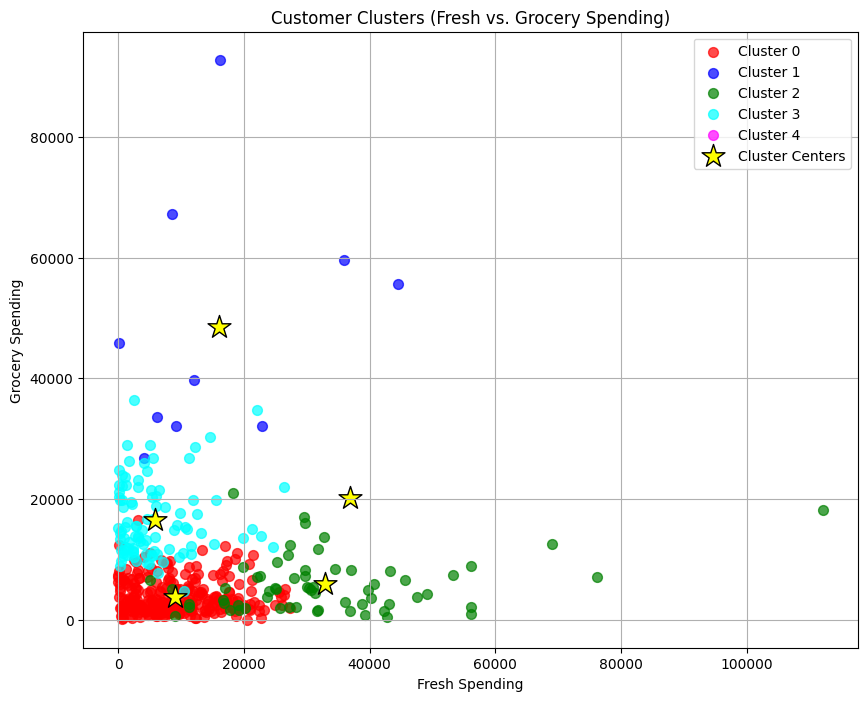

Customer clusters visualization using original features complete.


In [24]:
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

for cluster_id in sorted(data['Cluster'].unique()):
    cluster_data = data[data['Cluster'] == cluster_id]
    plt.scatter(
        cluster_data['Fresh'],
        cluster_data['Grocery'],
        s=50,
        c=colors[cluster_id],
        label=f'Cluster {cluster_id}',
        alpha=0.7
    )

# Calculate and plot cluster centers using original features
cluster_centers_original = data.groupby('Cluster')[['Fresh', 'Grocery']].mean()
plt.scatter(
    cluster_centers_original['Fresh'],
    cluster_centers_original['Grocery'],
    s=300,
    marker='*', # Use a star marker for centers
    c='yellow', # Distinct color for centers
    edgecolor='black',
    label='Cluster Centers'
)

plt.title('Customer Clusters (Fresh vs. Grocery Spending)')
plt.xlabel('Fresh Spending')
plt.ylabel('Grocery Spending')
plt.legend()
plt.grid(True)
plt.show()
print("Customer clusters visualization using original features complete.")

In [25]:
print("\nDistribution of Channel within each Cluster:\n")
display(data.groupby('Cluster')['Channel'].value_counts(normalize=True).unstack(fill_value=0))

print("\nDistribution of Region within each Cluster:\n")
display(data.groupby('Cluster')['Region'].value_counts(normalize=True).unstack(fill_value=0))


Distribution of Channel within each Cluster:



Channel,1,2
Cluster,,
0,0.862963,0.137037
1,0.000000,1.000000
2,0.873016,0.126984
3,0.093750,0.906250
4,1.000000,0.000000



Distribution of Region within each Cluster:



Region,1,2,3
Cluster,,,
0,0.185185,0.111111,0.703704
1,0.200000,0.100000,0.700000
2,0.126984,0.063492,0.809524
3,0.177083,0.125000,0.697917
4,0.000000,0.000000,1.000000


In [26]:
cluster_profiles = data.groupby('Cluster')[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].mean()
overall_means = data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].mean()

print("Cluster Profiles (Mean of Purchasing Behavior Features):\n")
display(cluster_profiles)

print("\nOverall Mean of Purchasing Behavior Features:\n")
display(overall_means)

Cluster Profiles (Mean of Purchasing Behavior Features):



,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
0,9092.155556,2967.759259,3807.411111,2271.759259,989.814815,978.962963
1,15964.900000,34708.500000,48536.900000,3054.600000,24875.200000,2942.800000
2,32957.984127,4997.349206,5884.761905,8422.841270,954.603175,2462.968254
3,5754.166667,10866.604167,16607.104167,1464.125000,7202.875000,1813.385417
4,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000



Overall Mean of Purchasing Behavior Features:



,0
Fresh,12000.297727
Milk,5796.265909
Grocery,7951.277273
Frozen,3071.931818
Detergents_Paper,2881.493182
Delicassen,1524.870455
